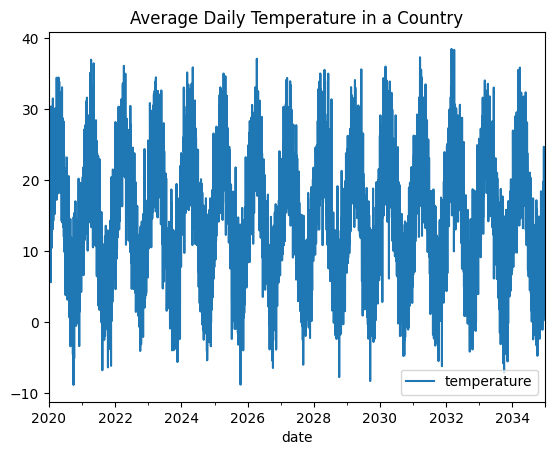

In [17]:
# Simulate 5 years of average daily temperatures in a country
# taking into account the seasonal variation in temperature
# You can use a sinusoïdal function to simulate the seasonal variation, with peaks in summer and troughs in winter and
# then add some noise to simulate the daily variation in temperature.
# The average daily temperature in the country is 10°C.
# The amplitude of the seasonal variation is 15°C.
# The standard deviation of the noise is 5°C.
# The simulation should output a pandas dataframe with the date and the temperature for each day.
# The date should be in the format YYYY-MM-DD.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Set the parameters
n_years = 15
n_days = 365 * n_years
average_temperature = 15
amplitude = 10
std_dev = 5

# Create the date range
dates = pd.date_range(start='2020-01-01', periods=n_days)

# Create the seasonal variation
seasonal_variation = amplitude * np.sin(2 * np.pi * np.arange(n_days) / 365)

# Create the noise
noise = np.random.normal(0, std_dev, n_days)

# Create the temperature
temperature = average_temperature + seasonal_variation + noise

# Create the dataframe
df = pd.DataFrame({'date': dates, 'temperature': temperature})

# Plot the temperature
df.plot(x='date', y='temperature', title='Average Daily Temperature in a Country')
plt.show()

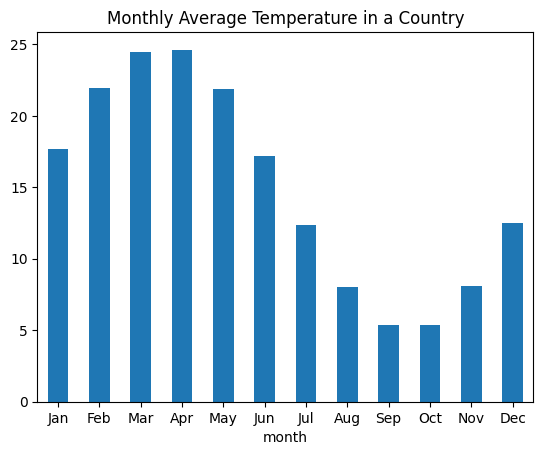

In [18]:
# df: resample to compute the average temperature for each month
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['temperature'].mean()

# Plot the monthly average temperature
monthly_avg.plot(kind='bar', title='Monthly Average Temperature in a Country')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

plt.show()

In [19]:
df['temperature'].mean()

14.91727651613265

In [20]:
(0.1 * df['temperature']).clip(0.1).mean()

1.503088360559985

In [21]:
(0.1 * df['temperature']).clip(0.1).mean()/10

0.15030883605599848

In [22]:
# Add a column to the dataframe to indicate the ice creams sales (in thousands of units) based on the temperature
df['ice_cream_sales'] = 10 + 2 * df['temperature']

# Add the drowning accidents (in units) based on the temperature. Use a Poisson distribution to simulate the number of drowning accidents
# with a rate of 0.1 per 1000 units of temperature.
df['drowning_accidents'] = np.random.poisson((0.1 * df['temperature']).clip(0.1) / 10)

df.set_index('date', inplace=True)

df.drop(columns='month', inplace=True)

df


,temperature,ice_cream_sales,drowning_accidents
date,,,
2020-01-01,23.820262,57.640523,1
2020-01-02,17.172920,44.345839,0
2020-01-03,20.237906,50.475812,0
2020-01-04,26.720663,63.441325,1
2020-01-05,25.025814,60.051628,0
...,...,...,...
2034-12-23,20.737801,51.475602,1
2034-12-24,13.710352,37.420705,0
2034-12-25,9.212256,28.424511,0


In [23]:
df[['ice_cream_sales', 'drowning_accidents']]

,ice_cream_sales,drowning_accidents
date,,
2020-01-01,57.640523,1
2020-01-02,44.345839,0
2020-01-03,50.475812,0
2020-01-04,63.441325,1
2020-01-05,60.051628,0
...,...,...
2034-12-23,51.475602,1
2034-12-24,37.420705,0
2034-12-25,28.424511,0


In [27]:
# Monthly aggregate of daily data (average temperature, sum of ice creams and drownings)
monthly_df = df.resample('ME').agg({'temperature': 'mean', 'ice_cream_sales': 'sum', 'drowning_accidents': 'sum'})
monthly_df.head()

,temperature,ice_cream_sales,drowning_accidents
date,,,
2020-01-31,19.691218,1530.855524,8
2020-02-29,20.398022,1473.085275,4
2020-03-31,23.785712,1784.714136,7
2020-04-30,27.277420,1936.645224,2
2020-05-31,22.763424,1721.332303,10


In [ ]:
# Compute the correlation between temperature the ice cream sales and drowning accidents
monthly_df.corr()


,temperature,ice_cream_sales,drowning_accidents
temperature,1.000000,0.995493,0.741090
ice_cream_sales,0.995493,1.000000,0.740275
drowning_accidents,0.741090,0.740275,1.000000


: 

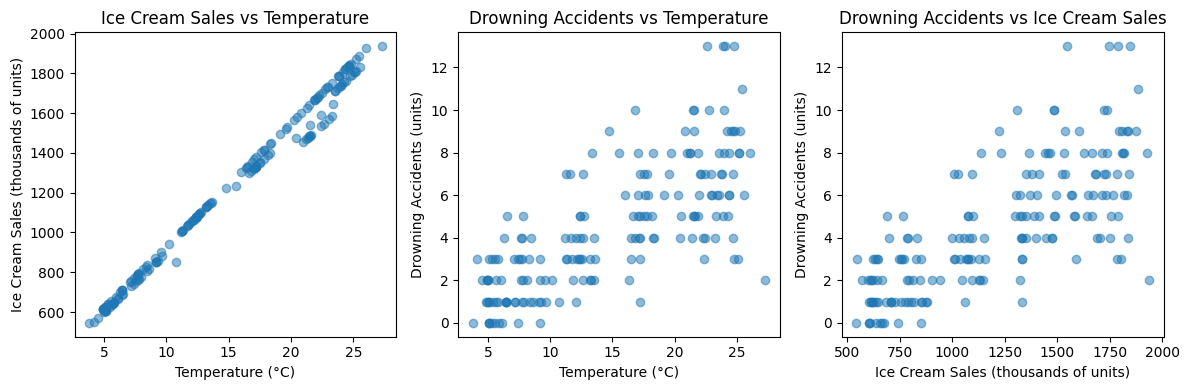

In [8]:
# Scatter plot of ice cream sales vs temperature, creams sales vs temperature, and drowning accidents vs temperature
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(monthly_df['temperature'], monthly_df['ice_cream_sales'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (thousands of units)')
plt.title('Ice Cream Sales vs Temperature')

plt.subplot(1, 3, 2)
plt.scatter(monthly_df['temperature'], monthly_df['drowning_accidents'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Drowning Accidents (units)')
plt.title('Drowning Accidents vs Temperature')

plt.subplot(1, 3, 3)
plt.scatter(monthly_df['ice_cream_sales'], monthly_df['drowning_accidents'], alpha=0.5)
plt.xlabel('Ice Cream Sales (thousands of units)')
plt.ylabel('Drowning Accidents (units)')
plt.title('Drowning Accidents vs Ice Cream Sales')

plt.tight_layout()
plt.show()

In [ ]:
monthly_df.to_csv('../DATA/icecreams_drowning_monthly_data.csv')